In [107]:
#Get all packages needed
import pandas as pd
import numpy as np
import datetime as dt
import plotly.graph_objects as go

import plotly.express as px # for color setting


from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:.2f}'.format) #Get rid of scientific notation







In [108]:
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheetname="NewCustomerList",
                   skiprows=1,
                   comment='#',
                   sep='\t',
                   header=0,
                   parse_dates=True )

df.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [109]:
# rename for easier analysis
df.rename(columns={"first_name":"fname",
                   "last_name":"lname",
                   "gender":"gender",
                   "past_3_years_bike_related_purchases":"3y_bike_purchases",
                   "DOB":"DOB",
                   "job_title":"JT"}, inplace = True)
df.rename(columns={"job_industry_category":"Category",
                   "wealth_segment":"wealth_segment",
                   "deceased_indicator":"D_Indicator",
                   "default":"default",
                   "owns_car":"owns_car",
                   "tenure":"tenure"}, inplace = True)

In [110]:
df.head()

,fname,lname,gender,3y_bike_purchases,DOB,JT,Category,wealth_segment,D_Indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.70,0.88,0.74,1,1,1.72
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.89,1.11,0.95,1,1,1.72
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.01,1.01,1.01,1,1,1.72
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.09,1.09,1.09,4,4,1.70
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.52,0.65,0.65,4,4,1.70


In [111]:
df.gender.unique()


array(['Male', 'Female', 'U'], dtype=object)

<h1>Remap the gender

In [112]:
gen = {'M':"Male", 'F':'Female', 'Male':"Male", 'Female':'Female', 'Femal':'Female', 'U': 'Unknown'}
df['gender'] = df['gender'].map(gen)

In [113]:
df.head()


,fname,lname,gender,3y_bike_purchases,DOB,JT,Category,wealth_segment,D_Indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.70,0.88,0.74,1,1,1.72
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.89,1.11,0.95,1,1,1.72
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.01,1.01,1.01,1,1,1.72
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.09,1.09,1.09,4,4,1.70
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.52,0.65,0.65,4,4,1.70


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
fname                 1000 non-null object
lname                 971 non-null object
gender                1000 non-null object
3y_bike_purchases     1000 non-null int64
DOB                   983 non-null datetime64[ns]
JT                    894 non-null object
Category              835 non-null object
wealth_segment        1000 non-null object
D_Indicator           1000 non-null object
owns_car              1000 non-null object
tenure                1000 non-null int64
address               1000 non-null object
postcode              1000 non-null int64
state                 1000 non-null object
country               1000 non-null object
property_valuation    1000 non-null int64
Unnamed: 16           1000 non-null float64
Unnamed: 17           1000 non-null float64
Unnamed: 18           1000 non-null float64
Unnamed: 19           1000 non-null float64
Unnamed: 20           1000 non

<h1>Check missing data percentage

In [115]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


fname - 0.0%
lname - 3.0%
gender - 0.0%
3y_bike_purchases - 0.0%
DOB - 2.0%
JT - 11.0%
Category - 16.0%
wealth_segment - 0.0%
D_Indicator - 0.0%
owns_car - 0.0%
tenure - 0.0%
address - 0.0%
postcode - 0.0%
state - 0.0%
country - 0.0%
property_valuation - 0.0%
Unnamed: 16 - 0.0%
Unnamed: 17 - 0.0%
Unnamed: 18 - 0.0%
Unnamed: 19 - 0.0%
Unnamed: 20 - 0.0%
Rank - 0.0%
Value - 0.0%


In [116]:
df.isna().any()

fname                 False
lname                  True
gender                False
3y_bike_purchases     False
DOB                    True
JT                     True
Category               True
wealth_segment        False
D_Indicator           False
owns_car              False
tenure                False
address               False
postcode              False
state                 False
country               False
property_valuation    False
Unnamed: 16           False
Unnamed: 17           False
Unnamed: 18           False
Unnamed: 19           False
Unnamed: 20           False
Rank                  False
Value                 False
dtype: bool

In [117]:
df.isnull().sum()/len(df)



fname                0.00
lname                0.03
gender               0.00
3y_bike_purchases    0.00
DOB                  0.02
JT                   0.11
Category             0.17
wealth_segment       0.00
D_Indicator          0.00
owns_car             0.00
tenure               0.00
address              0.00
postcode             0.00
state                0.00
country              0.00
property_valuation   0.00
Unnamed: 16          0.00
Unnamed: 17          0.00
Unnamed: 18          0.00
Unnamed: 19          0.00
Unnamed: 20          0.00
Rank                 0.00
Value                0.00
dtype: float64

In [118]:
df[df.isna().any(axis=1)]



,fname,lname,gender,3y_bike_purchases,DOB,JT,Category,wealth_segment,D_Indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
12,Olag,NaN,Male,60,1990-05-13,Human Resources Manager,Telecommunications,Mass Customer,N,No,...,NSW,Australia,11,0.43,0.43,0.54,0.46,13,13,1.61
15,Dukie,Swire,Male,88,1954-03-31,NaN,Manufacturing,Affluent Customer,N,Yes,...,NSW,Australia,8,0.58,0.72,0.91,0.91,16,16,1.56
22,Otis,Ottey,Male,26,1998-02-05,Quality Engineer,NaN,Mass Customer,N,No,...,QLD,Australia,4,1.02,1.02,1.02,0.87,23,23,1.50
23,Tabbatha,Averill,Female,5,1977-12-17,Quality Control Specialist,NaN,Affluent Customer,N,Yes,...,NSW,Australia,8,0.72,0.90,0.90,0.90,23,23,1.50
25,Rourke,Gillbard,Male,11,1945-08-03,NaN,Property,Mass Customer,N,No,...,QLD,Australia,4,0.59,0.59,0.59,0.50,26,26,1.47
29,Rhona,De Freyne,Female,45,1960-11-22,NaN,Health,High Net Worth,N,No,...,VIC,Australia,10,0.73,0.73,0.91,0.91,30,30,1.46
30,Sharron,Claibourn,Female,62,1980-01-26,NaN,Financial Services,High Net Worth,N,Yes,...,NSW,Australia,8,0.71,0.89,0.89,0.89,30,30,1.46
33,Mikel,McNess,Male,71,1981-09-22,Nurse,NaN,Mass Customer,N,No,...,QLD,Australia,9,0.70,0.70,0.88,0.74,32,32,1.45
36,Farlie,Petford,Male,76,1968-03-25,Recruiting Manager,NaN,High Net Worth,N,No,...,NSW,Australia,10,0.86,0.86,1.07,1.07,36,36,1.45
37,Mitchell,MacCague,Male,58,1979-04-11,NaN,Manufacturing,Mass Customer,N,No,...,VIC,Australia,8,0.62,0.62,0.62,0.53,38,38,1.44


<h1>Cleaning

In [119]:
# Drop NA, can't only be done in a df level, if done in a column level,
# then columns result in different length.
# df.dropna(axis=0, how='any', inplace=True)


# Fill Na with mean
#df["tenure"].fillna(value=df.tenure.mean(),inplace=True)

# Fill Na with mode
df['lname'].fillna(df['lname'].mode().iloc[0],inplace=True)
df['JT'].fillna(df['JT'].mode().iloc[0],inplace=True)
df['Category'].fillna(df['Category'].mode().iloc[0],inplace=True)
#df['DOB'].fillna(df['DOB'].mode().iloc[0],inplace=True)

In [120]:
df.dropna(axis=0, how='any', inplace=True)

In [121]:
# check again
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

fname - 0.0%
lname - 0.0%
gender - 0.0%
3y_bike_purchases - 0.0%
DOB - 0.0%
JT - 0.0%
Category - 0.0%
wealth_segment - 0.0%
D_Indicator - 0.0%
owns_car - 0.0%
tenure - 0.0%
address - 0.0%
postcode - 0.0%
state - 0.0%
country - 0.0%
property_valuation - 0.0%
Unnamed: 16 - 0.0%
Unnamed: 17 - 0.0%
Unnamed: 18 - 0.0%
Unnamed: 19 - 0.0%
Unnamed: 20 - 0.0%
Rank - 0.0%
Value - 0.0%


In [122]:
df.describe()

,3y_bike_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,983.00,983.00,983.00,983.00,983.00,983.00,983.00,983.00,983.00,983.00,983.00
mean,49.82,11.46,3017.74,7.41,0.75,0.84,0.94,0.87,497.75,497.75,0.88
std,27.79,5.01,849.38,2.76,0.21,0.25,0.29,0.28,289.19,289.19,0.29
min,0.00,1.00,2000.00,1.00,0.40,0.40,0.40,0.34,1.00,1.00,0.34
25%,27.00,8.00,2209.00,6.00,0.57,0.63,0.71,0.66,248.50,248.50,0.65
50%,51.00,11.00,2795.00,8.00,0.75,0.82,0.91,0.84,500.00,500.00,0.86
75%,72.00,15.00,3850.50,9.00,0.92,1.03,1.14,1.06,748.00,748.00,1.08
max,99.00,22.00,4879.00,12.00,1.10,1.38,1.72,1.72,1000.00,1000.00,1.72


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 999
Data columns (total 23 columns):
fname                 983 non-null object
lname                 983 non-null object
gender                983 non-null object
3y_bike_purchases     983 non-null int64
DOB                   983 non-null datetime64[ns]
JT                    983 non-null object
Category              983 non-null object
wealth_segment        983 non-null object
D_Indicator           983 non-null object
owns_car              983 non-null object
tenure                983 non-null int64
address               983 non-null object
postcode              983 non-null int64
state                 983 non-null object
country               983 non-null object
property_valuation    983 non-null int64
Unnamed: 16           983 non-null float64
Unnamed: 17           983 non-null float64
Unnamed: 18           983 non-null float64
Unnamed: 19           983 non-null float64
Unnamed: 20           983 non-null int64
Rank  

<h1>Make the age groups

In [124]:
import datetime as dt

# Make sure to parse all datetime columns in advance
# actually we have done it when importing data, this is unnecessary

df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

In [125]:
now = pd.to_datetime('now')

# first we find the date difference, get it as seconds, and then divided by the total seconds in a year.
df["Age"] = round((now - df['DOB']).dt.total_seconds() / (60*60*24*365.25),2)

df.head()


,fname,lname,gender,3y_bike_purchases,DOB,JT,Category,wealth_segment,D_Indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.56,0.70,0.88,0.74,1,1,1.72,63.05
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.89,0.89,1.11,0.95,1,1,1.72,50.36
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,1.01,1.01,1.01,1.01,1,1,1.72,45.92
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.87,1.09,1.09,1.09,4,4,1.70,41.50
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.52,0.52,0.65,0.65,4,4,1.70,54.86


In [126]:
# Use pandas.cut with parameter right=False for not includes the rightmost edge of bins:
bins= [0,21,31,41,51,61,110]
labels = ['0-20','21-30','31-40','41-50','51-60', '>60']
# age_label = ['0','1','2','3','4', '5']

df['A_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [127]:
df.head()

,fname,lname,gender,3y_bike_purchases,DOB,JT,Category,wealth_segment,D_Indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,Age,A_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,0.56,0.70,0.88,0.74,1,1,1.72,63.05,>60
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,11,0.89,0.89,1.11,0.95,1,1,1.72,50.36,41-50
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5,1.01,1.01,1.01,1.01,1,1,1.72,45.92,41-50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1,0.87,1.09,1.09,1.09,4,4,1.70,41.50,41-50
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,9,0.52,0.52,0.65,0.65,4,4,1.70,54.86,51-60


<h1>Locate the upper outliner

In [128]:
df.describe()

,3y_bike_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,Age
count,983.00,983.00,983.00,983.00,983.00,983.00,983.00,983.00,983.00,983.00,983.00,983.00
mean,49.82,11.46,3017.74,7.41,0.75,0.84,0.94,0.87,497.75,497.75,0.88,49.28
std,27.79,5.01,849.38,2.76,0.21,0.25,0.29,0.28,289.19,289.19,0.29,17.07
min,0.00,1.00,2000.00,1.00,0.40,0.40,0.40,0.34,1.00,1.00,0.34,18.42
25%,27.00,8.00,2209.00,6.00,0.57,0.63,0.71,0.66,248.50,248.50,0.65,37.30
50%,51.00,11.00,2795.00,8.00,0.75,0.82,0.91,0.84,500.00,500.00,0.86,48.35
75%,72.00,15.00,3850.50,9.00,0.92,1.03,1.14,1.06,748.00,748.00,1.08,62.81
max,99.00,22.00,4879.00,12.00,1.10,1.38,1.72,1.72,1000.00,1000.00,1.72,82.15


In [129]:
df.Age.max()

82.15

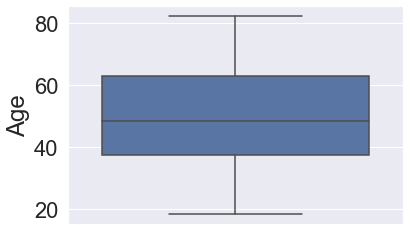

In [130]:
import seaborn as sns
boxplot = sns.boxplot(y="Age", data=df,)




In [131]:
print(np.percentile(df.Age,[99]))
print(np.percentile(df.Age,[99])[0])
uo = np.percentile(df.Age,[99])[0]



[81.6454]
81.6454


In [132]:
df[(df.Age>uo)]["Age"]

18    81.72
191   81.79
265   81.92
406   81.67
414   81.89
585   81.92
689   81.91
769   81.99
797   82.15
885   82.14
Name: Age, dtype: float64

In [133]:
#To correct it:
df.Age[(df.Age>1.3*uo)]=1.3*uo

In [134]:
df[(df.Age>uo)]["Age"]

# the number 33, outliner is gone


18    81.72
191   81.79
265   81.92
406   81.67
414   81.89
585   81.92
689   81.91
769   81.99
797   82.15
885   82.14
Name: Age, dtype: float64

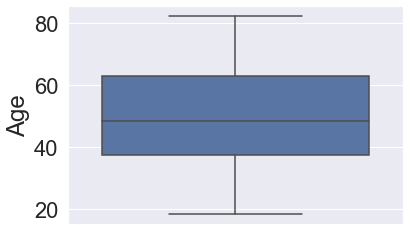

In [135]:
boxplot = sns.boxplot(y="Age", data=df,)

<h1> Finish Cleaning

In [136]:
df.to_csv("cleaned.csv")



<h1>Analyze the Gender vs Bikes bought

In [137]:
#array(['Male', 'Female', 'Unknown'] from KPMG_VI.py
gender = [0,0,0] #first is Female, second if Male, third is Unknown
for y in df['gender']:
    if y == 'Female':
        gender[0] += 1

    elif y == 'Male':
        gender[1] += 1

    else:
        gender[2] += 1

print(gender)


[513, 470, 0]


In [144]:
bike = [0,0,0]
bike[0] += df['3y_bike_purchases'][df['gender'] == 'Female'].sum()
bike[1] += df['3y_bike_purchases'][df['gender'] == 'Male'].sum()
bike[2] += df['3y_bike_purchases'][df['gender'] == 'Unknown'].sum()

print(bike)

[25212, 23765, 0]


In [145]:
import plotly.graph_objects as go

Genders = ['Female', 'Male', 'unKnown']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=Genders,
    y=gender,
    name='Number of People by Genders',
    marker_color='indianred',
    text=gender,
    textposition='auto'
))
fig.add_trace(go.Bar(
    x=Genders,
    y=bike,
    name='Purchase Amount by Genders',
    marker_color='lightsalmon',
    text=bike,
    textposition='auto'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group',
                  xaxis_tickangle=-45,
                  title_text='Bike Purchases',
                  title_x=0.5,
                  legend=dict(
                    yanchor="top",
                    y=0.99,
                    xanchor="left",
                    x=0.7),

                  )
fig.show()


In [146]:
sum_of_sales = df["3y_bike_purchases"].sum()
sum_of_sales


48977

In [147]:
avg  = [0,0,0]
sum_of_sales = df["3y_bike_purchases"].sum()
for i in range(len(avg)):
    avg[i] += round((bike[i]/sum_of_sales)*100,2)


avg


[51.48, 48.52, 0.0]

In [148]:
import plotly.graph_objects as go

Genders = ['Female', 'Male', 'unKnown']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=Genders,
    y=avg,
    name='Purchase Amount by Genders in %',
    marker_color='lightsalmon',
    text=avg,
    textposition='auto',
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group',
                  xaxis_tickangle=-45,
                  title_text='Bike Purchases by Gender in %',
                  title_x=0.5,
                  yaxis=dict(ticksuffix="%",
                             tickangle=45,
                             title='Percentage(%)')
                  )
fig.show()



<h1>Analyze on the age vs bikes bought

In [158]:
print(df['A_group'].value_counts(sort=False).index)
print("/n")
print(df['A_group'].value_counts(sort=False).values)

CategoricalIndex(['0-20', '21-30', '31-40', '41-50', '51-60', '>60'], categories=['0-20', '21-30', '31-40', '41-50', '51-60', '>60'], ordered=True, dtype='category')
/n
[ 32 164 111 223 175 278]


In [160]:

import plotly.graph_objects as go


df['A_group'].value_counts(sort=False)

age_pie_label = df['A_group'].value_counts(sort=False).index
age_pie_value = df['A_group'].value_counts(sort=False).values

# pull is given as a fraction of the pie radius
fig = go.Figure(go.Pie(
    # age_pie_label is ok as well, just it doesn't have "Age:", so we make a new labels
    labels=age_pie_label,
    values=age_pie_value,
    pull=[0, 0, 0, 0, 0, 0.2],
    text=age_pie_label,
    textposition='auto',
    marker= {
      'colors': px.colors.qualitative.Set2},

    )
)

fig.update_traces(hole=.2,
                  hoverinfo="label+percent")

fig.update_layout(
    title_text="Purchase Amount by Age Group",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Age', x=0.5, y=0.5, font_size=20, showarrow=False)],
    title_x=0.5,
                  legend=dict(
                    yanchor="top",
                    y=0.99,
                    xanchor="left",
                    x=0.0),
)
fig.show()

<h1> Sales by Gender and Age groups

In [161]:
Age_label = ['0-20','21-30','31-40','41-50','51-60', '>60']


df[['gender', "A_group", '3y_bike_purchases']].groupby(['gender',"A_group"]).sum()
df_by_age_gen = df[['gender', "A_group", '3y_bike_purchases']].groupby(['gender',"A_group"]).sum()
df_by_age_gen




3y_bike_purchases
gender A_group                   
Female 0-20                   842
       21-30                 3578
       31-40                 3078
       41-50                 5729
       51-60                 5059
       >60                   6926
Male   0-20                   536
       21-30                 4985
       31-40                 2651
       41-50                 4940
       51-60                 4044
       >60                   6609

In [192]:


Age_label = ['0-20','21-30','31-40','41-50','51-60', '>60']

print("Women")
print(df_by_age_gen["3y_bike_purchases"]["Female"].index)
print("\n")
print(df_by_age_gen["3y_bike_purchases"]["Female"].values)

print("Men")
print(df_by_age_gen["3y_bike_purchases"]["Male"].index)
print("\n")
print(df_by_age_gen["3y_bike_purchases"]["Male"].values)


import plotly.express as px # for color setting
import plotly.graph_objects as go

W_Sales = df_by_age_gen["3y_bike_purchases"]["Female"].values
M_Sales = df_by_age_gen["3y_bike_purchases"]["Male"].values

fig = go.Figure()
fig.add_trace(go.Bar(
    x=Age_label,
    y=W_Sales,
    name='Purchase Amount by Women',
    marker_color=px.colors.qualitative.Set2[3],
    text=W_Sales,
    textposition='auto'
))
fig.add_trace(go.Bar(
    x=Age_label,
    y=M_Sales,
    name='Purchase Amount by Men',
    marker_color=px.colors.qualitative.Set2[2],
    text=M_Sales,
    textposition='auto'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group',
                  xaxis_tickangle=-45,
                  title_text='Sales by Gender and Age',
                  title_x=0.5,
                  legend=dict(
                    yanchor="top",
                    y=0.99,
                    xanchor="left",
                    x=0.01),
                  yaxis=dict(#tickprefix="$",
                             tickangle=45,
                             title='Bike Related Purchases in the Past 3 Years'),
                  xaxis=dict(tickprefix="",
                             tickangle=45,
                             title='Age by Gender'),

                  )
fig.show()

Women
CategoricalIndex(['0-20', '21-30', '31-40', '41-50', '51-60', '>60'], categories=['0-20', '21-30', '31-40', '41-50', '51-60', '>60'], ordered=True, name='A_group', dtype='category')


[ 842 3578 3078 5729 5059 6926]
Men
CategoricalIndex(['0-20', '21-30', '31-40', '41-50', '51-60', '>60'], categories=['0-20', '21-30', '31-40', '41-50', '51-60', '>60'], ordered=True, name='A_group', dtype='category')


[ 536 4985 2651 4940 4044 6609]


In [194]:



Cat_index = df['Category'].value_counts(sort=False).index
Cat_count = df['Category'].value_counts(sort=False).values
print(Cat_index, Cat_count)




Index(['Argiculture', 'Entertainment', 'Manufacturing', 'Financial Services',
       'Health', 'Telecommunications', 'Property', 'Retail', 'IT'],
      dtype='object') [ 26  36 199 367 152  25  64  78  36]


<h1> Job industry investigation

In [195]:

import plotly.graph_objects as go


# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=Cat_index, y=Cat_count,
            text=Cat_count,
            textposition='auto',
            marker_color='indianred'
        )])

fig.show()



<h1> Sales by Wealth Segment and Age Groups

In [196]:
df.columns.values

array(['fname', 'lname', 'gender', '3y_bike_purchases', 'DOB', 'JT',
       'Category', 'wealth_segment', 'D_Indicator', 'owns_car', 'tenure',
       'address', 'postcode', 'state', 'country', 'property_valuation',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Rank', 'Value', 'Age', 'A_group'], dtype=object)

In [197]:
wealth_index = df['wealth_segment'].value_counts(sort=False).index
wealth_count = df['wealth_segment'].value_counts(sort=False).values
print(wealth_index, wealth_count)

Index(['High Net Worth', 'Affluent Customer', 'Mass Customer'], dtype='object') [249 235 499]


In [198]:
Age_label = ['0-20','21-30','31-40','41-50','51-60', '>60']


df[['wealth_segment', "A_group", '3y_bike_purchases']].groupby(['wealth_segment',"A_group"]).sum()
df_by_wealth_age = df[['wealth_segment', "A_group", '3y_bike_purchases']].groupby(['wealth_segment',"A_group"]).sum()
df_by_wealth_age

3y_bike_purchases
wealth_segment    A_group                   
Affluent Customer 0-20                   279
                  21-30                 2364
                  31-40                 1075
                  41-50                 2652
                  51-60                 2010
                  >60                   3342
High Net Worth    0-20                   331
                  21-30                 2180
                  31-40                 1667
                  41-50                 2468
                  51-60                 2469
                  >60                   3538
Mass Customer     0-20                   768
                  21-30                 4019
                  31-40                 2987
                  41-50                 5549
                  51-60                 4624
                  >60                   6655

In [199]:
df_by_wealth_age["3y_bike_purchases"]["Mass Customer"].index

CategoricalIndex(['0-20', '21-30', '31-40', '41-50', '51-60', '>60'], categories=['0-20', '21-30', '31-40', '41-50', '51-60', '>60'], ordered=True, name='A_group', dtype='category')

In [200]:
Age_label = ['0-20','21-30','31-40','41-50','51-60', '>60']

print("Affluent Customer")
print(df_by_wealth_age["3y_bike_purchases"]["Affluent Customer"].index)
print("\n")
print(df_by_wealth_age["3y_bike_purchases"]["Affluent Customer"].values)

print("High Net Worth")
print(df_by_wealth_age["3y_bike_purchases"]["High Net Worth"].index)
print("\n")
print(df_by_wealth_age["3y_bike_purchases"]["High Net Worth"].values)


print("Mass Customer")
print(df_by_wealth_age["3y_bike_purchases"]["Mass Customer"].index)
print("\n")
print(df_by_wealth_age["3y_bike_purchases"]["Mass Customer"].values)

Affluent Customer
CategoricalIndex(['0-20', '21-30', '31-40', '41-50', '51-60', '>60'], categories=['0-20', '21-30', '31-40', '41-50', '51-60', '>60'], ordered=True, name='A_group', dtype='category')


[ 279 2364 1075 2652 2010 3342]
High Net Worth
CategoricalIndex(['0-20', '21-30', '31-40', '41-50', '51-60', '>60'], categories=['0-20', '21-30', '31-40', '41-50', '51-60', '>60'], ordered=True, name='A_group', dtype='category')


[ 331 2180 1667 2468 2469 3538]
Mass Customer
CategoricalIndex(['0-20', '21-30', '31-40', '41-50', '51-60', '>60'], categories=['0-20', '21-30', '31-40', '41-50', '51-60', '>60'], ordered=True, name='A_group', dtype='category')


[ 768 4019 2987 5549 4624 6655]


In [203]:
import plotly.express as px # for color setting
import plotly.graph_objects as go

Affluent_Sales = df_by_wealth_age["3y_bike_purchases"]["Affluent Customer"].values
HN_Sales = df_by_wealth_age["3y_bike_purchases"]["High Net Worth"].values
Mass_Sales = df_by_wealth_age["3y_bike_purchases"]["Mass Customer"].values

fig = go.Figure()
fig.add_trace(go.Bar(
    x=Age_label,
    y=Affluent_Sales,
    name='Affluent Customer',
    marker_color=px.colors.qualitative.Set2[0],
    text="Affluent Customer",
    textposition='auto'
))
fig.add_trace(go.Bar(
    x=Age_label,
    y=HN_Sales,
    name='High Net Worth Customer',
    marker_color=px.colors.qualitative.Set2[1],
    text="High Net Worth",
    textposition='auto'
))

fig.add_trace(go.Bar(
    x=Age_label,
    y=Mass_Sales,
    name='Mass Customer',
    marker_color=px.colors.qualitative.Set2[2],
    text="Mass Customer",
    textposition='auto'
))


# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group',
                  xaxis_tickangle=-45,
                  title_text='Purchases by Wealth Segment and Age',
                  title_x=0.5,
                  legend=dict(
                    yanchor="top",
                    y=0.99,
                    xanchor="left",
                    x=0.01),
                  yaxis=dict(#tickprefix="$",
                             tickangle=45,
                             title='Bike Related Purchases in the Past 3 Years'),
                  xaxis=dict(tickprefix="",
                             tickangle=45,
                             title='Age'),

                  )
fig.show()


<h1>Wealth Segment by Customer Amount and Age Groups

In [204]:

df[['wealth_segment', "A_group", "fname"]].groupby(['wealth_segment',"A_group"])["fname"].count()

wealth_segment     A_group
Affluent Customer  0-20        10
                   21-30       45
                   31-40       20
                   41-50       57
                   51-60       38
                   >60         65
High Net Worth     0-20         6
                   21-30       45
                   31-40       31
                   41-50       50
                   51-60       45
                   >60         72
Mass Customer      0-20        16
                   21-30       74
                   31-40       60
                   41-50      116
                   51-60       92
                   >60        141
Name: fname, dtype: int64

In [205]:
df_by_wealth_ppl = df[['wealth_segment', "A_group", "fname"]].groupby(['wealth_segment',"A_group"])["fname"].count()
df_by_wealth_ppl

wealth_segment     A_group
Affluent Customer  0-20        10
                   21-30       45
                   31-40       20
                   41-50       57
                   51-60       38
                   >60         65
High Net Worth     0-20         6
                   21-30       45
                   31-40       31
                   41-50       50
                   51-60       45
                   >60         72
Mass Customer      0-20        16
                   21-30       74
                   31-40       60
                   41-50      116
                   51-60       92
                   >60        141
Name: fname, dtype: int64

In [206]:
wealth_ppl_flat = df_by_wealth_ppl.reset_index()
wealth_ppl_flat

,wealth_segment,A_group,fname
0,Affluent Customer,0-20,10
1,Affluent Customer,21-30,45
2,Affluent Customer,31-40,20
3,Affluent Customer,41-50,57
4,Affluent Customer,51-60,38
5,Affluent Customer,>60,65
6,High Net Worth,0-20,6
7,High Net Worth,21-30,45
8,High Net Worth,31-40,31
9,High Net Worth,41-50,50


In [207]:
import plotly.express as px


fig = px.bar(wealth_ppl_flat,
             x="A_group",
             y="fname",
             color="wealth_segment",
             title="Wealth Segment by Customer Amount and Age Groups",
             labels={'fname':'Customer Amount',
                     'A_group':'Age Groups',
                     'wealth_segment':'Wealth Segment'},
             #text=Age_label,

             )
fig.show()


<h1>Car Owner Investigation

In [208]:

df_cars = df[df.owns_car == "Yes"]
df_cars.head()

,fname,lname,gender,3y_bike_purchases,DOB,JT,Category,wealth_segment,D_Indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,Age,A_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,0.56,0.70,0.88,0.74,1,1,1.72,63.05,>60
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1,0.87,1.09,1.09,1.09,4,4,1.70,41.50,41-50
5,Druci,Brandli,Female,39,1951-04-29,Assistant Media Planner,Entertainment,High Net Worth,N,Yes,...,7,0.43,0.54,0.54,0.54,6,6,1.67,69.26,>60
7,Nancie,Vian,Female,74,1972-12-27,Human Resources Assistant II,Retail,Mass Customer,N,Yes,...,5,0.58,0.72,0.72,0.62,8,8,1.66,47.59,41-50
8,Duff,Karlowicz,Male,50,1972-04-28,Speech Pathologist,Manufacturing,Mass Customer,N,Yes,...,10,1.03,1.29,1.61,1.37,8,8,1.66,48.26,41-50


In [209]:
df[['gender', "A_group", "owns_car"]].groupby(['gender',"A_group"])["owns_car"].count()

gender  A_group
Female  0-20        18
        21-30       74
        31-40       59
        41-50      122
        51-60       95
        >60        145
Male    0-20        14
        21-30       90
        31-40       52
        41-50      101
        51-60       80
        >60        133
Name: owns_car, dtype: int64

In [210]:
df_car_gen_age = df_cars[['gender', "A_group", "owns_car"]].groupby(['gender',"A_group"])["owns_car"].count()

df_car_gen_age

gender  A_group
Female  0-20       12
        21-30      37
        31-40      26
        41-50      62
        51-60      52
        >60        72
Male    0-20        6
        21-30      42
        31-40      20
        41-50      45
        51-60      40
        >60        72
Name: owns_car, dtype: int64

In [211]:
df_car_gen_age = df_car_gen_age.reset_index()
df_car_gen_age.head()

,gender,A_group,owns_car
0,Female,0-20,12
1,Female,21-30,37
2,Female,31-40,26
3,Female,41-50,62
4,Female,51-60,52


<h1>Auto Count

In [212]:
import plotly.express as px

fig = px.histogram(df_cars,
                   x="Age",
                   y="owns_car",
                   color="gender",
                   marginal="box", # or violin, rug
                   hover_data=None,
                   labels={'owns_car':'Owning A Car',
                           'age':'Age',
                           'gender':'Genders'},
                   )
fig.show()

<h1> Correlation Investigation

In [213]:

df_cor = df[["gender","3y_bike_purchases","wealth_segment","owns_car","Age",]]
df_cor.head()

,gender,3y_bike_purchases,wealth_segment,owns_car,Age
0,Male,86,Mass Customer,Yes,63.05
1,Male,69,Mass Customer,No,50.36
2,Female,10,Affluent Customer,No,45.92
3,Female,64,Affluent Customer,Yes,41.50
4,Female,34,Affluent Customer,No,54.86


In [214]:
#create df as a copy of tx_user before applying get_dummies
df_cor_copy = df_cor.copy()
df_cor_dum = pd.get_dummies(df_cor_copy)
df_cor_dum.head()

,3y_bike_purchases,Age,gender_Female,gender_Male,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes
0,86,63.05,0,1,0,0,1,0,1
1,69,50.36,0,1,0,0,1,1,0
2,10,45.92,1,0,1,0,0,1,0
3,64,41.50,1,0,1,0,0,0,1
4,34,54.86,1,0,1,0,0,1,0


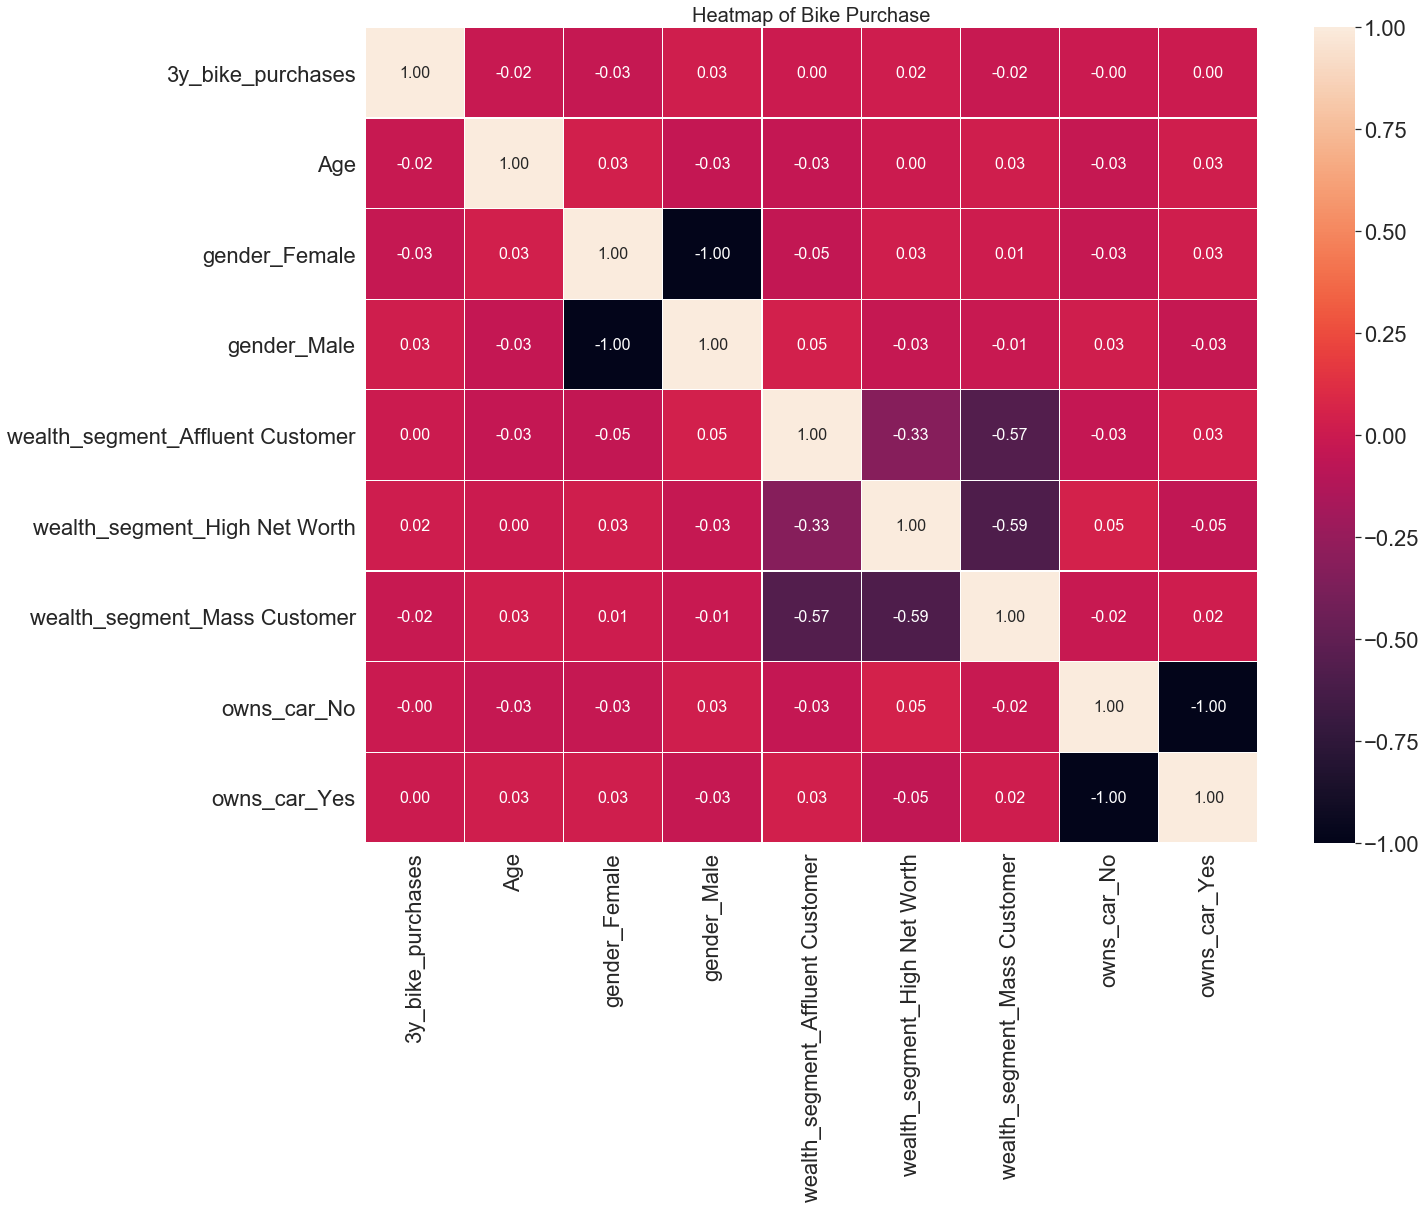

In [215]:
import seaborn as sns


plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation")
corr = df_cor_dum.corr()

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot = True,
            annot_kws={"size": 16},
            linewidths=0.2,
            fmt=".2f",)

plt.title('Heatmap of Bike Purchase', fontsize = 20) # title with fontsize 20
plt.xlabel('', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('', fontsize = 15) # y-axis label with fontsize 15

plt.show()

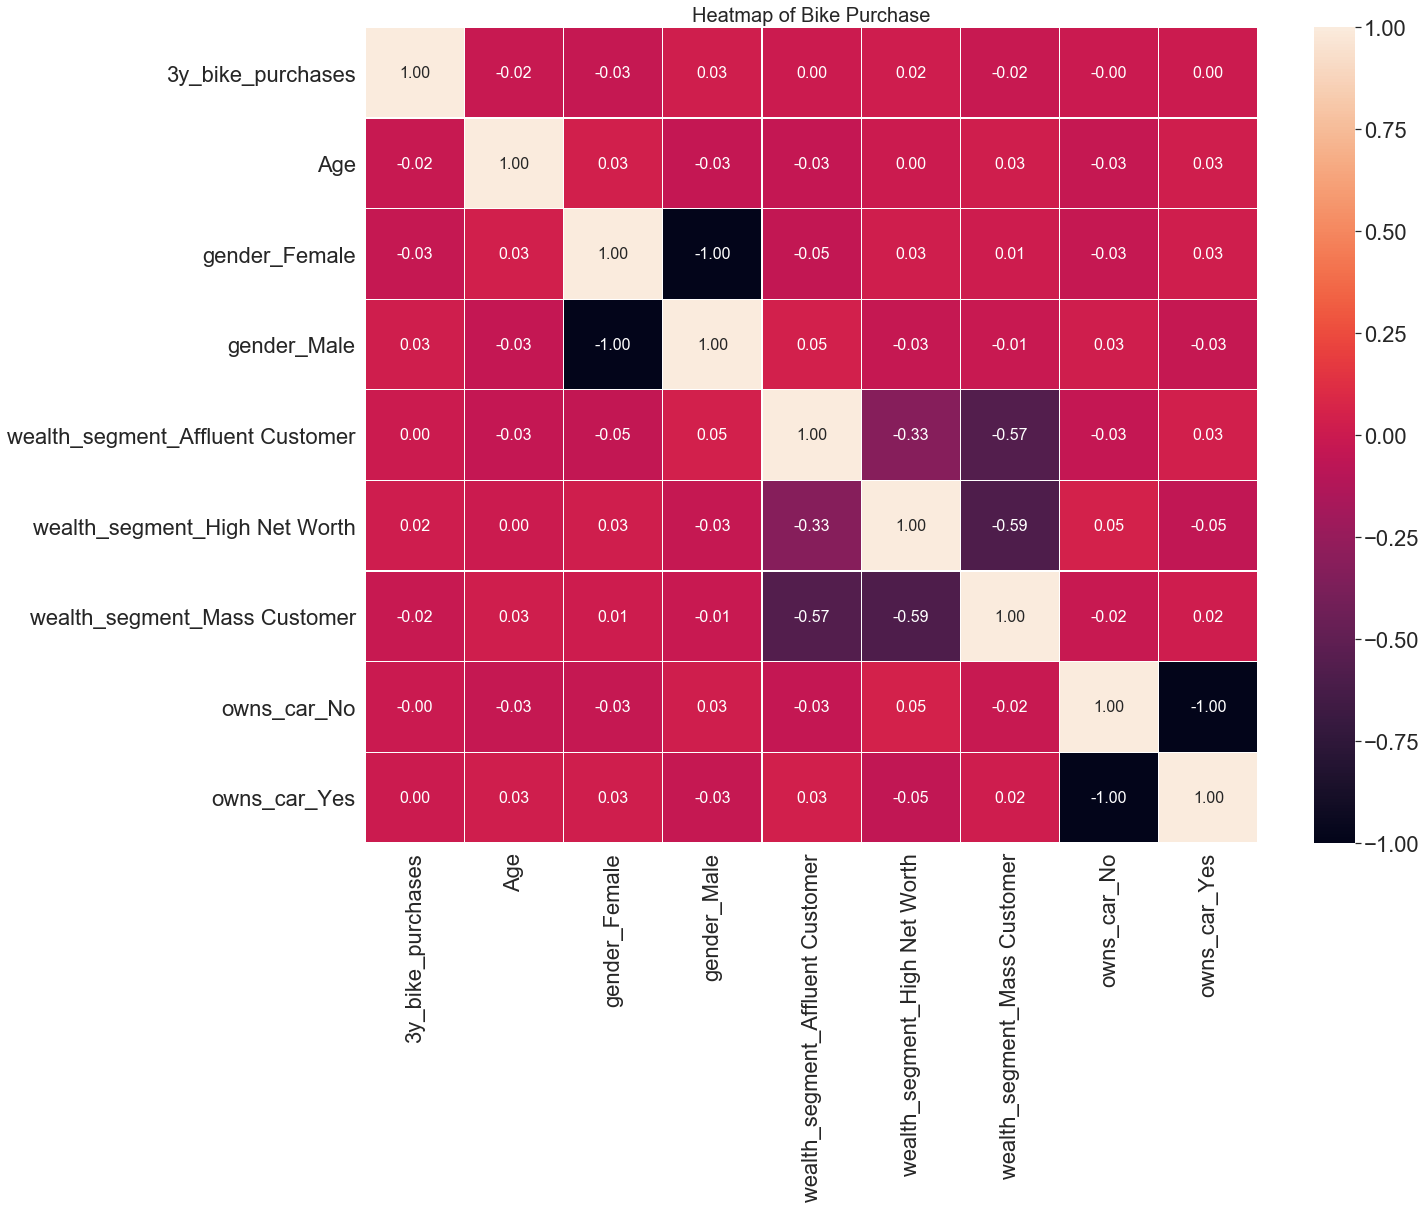

In [189]:
import seaborn as sns


plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation")
corr = df_cor_dum.corr()

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot = True,
            annot_kws={"size": 16},
            linewidths=0.2,
            fmt=".2f",)
sns.set(font_scale=2)
plt.title('Heatmap of Bike Purchase', fontsize = 20) # title with fontsize 20
plt.xlabel('', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('', fontsize = 15) # y-axis label with fontsize 15

plt.show()


In [127]:
plt.savefig('Heatmap.png', dpi=400)



<Figure size 432x288 with 0 Axes>